In [1]:

import functools
import sys

import pandas as pd
import matplotlib.pyplot as plt




#### Utilities

In [2]:
def plot(function, v1, v2, step=0.1, plot_axes=False):
    x = [v1]
    while x[-1] < v2:
        x.append(x[-1]+ step)
    y = [function(v) for v in x]
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    #  Plot axes.
    if plot_axes:
        plt.plot(x, [0 for _ in range(len(x))], color='gray',  linewidth=3)
        plt.plot([0 for _ in range(len(y))], y, color='gray',  linewidth=3)
        plt.grid( linestyle='--')

### A simplified example of Neural Network


#### How the NN model creation differs from classical programming

Note that aside from the collected data for input and output we are not given anything else. We do not have any other information about our data that would allow us to solve the problem following a **classical** programming approch.  

In **classical** programming we are given a set predifined set of rules that when used they lead us to the expected result.

In **machine learning** model creation we know in advance the input and the output and our objective is to find the algorithm that will allow use to predict values to new inputs that we have not seen before.

In **Traditional Programming** the input(s) are passed to a deterministic flowchart (algorithm) which produces the output:

![traditional-programming](./images/traditional-programming.png)

When **training** a neural network we are passing both the input and the expected output to the training function which discovers and fits a set of **weights**  that resembles the relation between input and output:

![training-ANN](./images/training-ANN.png)


A **trained** ANN receives unseen input, uses the **weights** that were found during the training phase and **predicts** the corresponding output.

![predicting-using-NN](./images/predicting-using-NN.png)

#### The main idea behind a neural network

Aartificial neural networks (ANN) are inspired from biological neural networks and to some extend try to mimic the way the human brain is learning.  The human brain contains over 100 billion interconnected neurons and each of them one consists of three main components: soma, axon and dendrietes as can be seem in the following image (taken from https://en.wikipedia.org/wiki/Biological_neuron_model)

![Human Brain](./images/soma-axon-dentrites.png "Human Brain")

#### How ANN resembles biological neural networks

The exact way of how the biological neural networks work is not fully understood and the way we are porting it to the computer can be thought as a loose analogy that models the theoretical model to same extend.  A neuron receives analog input from the axon and when it "fires" it transmit a new analog messages over its axon.

In ANN the interaction between nodes is simulated using a polynomiam which connects each neural with a previous layer of neurons as can be seen here:

![ann simplified](./images/ann-example.png)


**A simplified example of ANN**

Let's start with the most simplified example of a neural network that can
be possible and right after we will ramp it up to a more useful example
that will allow us to solve some east problems that still cannot be solved
following a "standard" approach to programming.


> Build a model to receive a numeric value and return the half of it.

We can think our model as a calculator that always divides its input by 2 and although this is over simplified case it will still be enough to intoduce us to the most basic problems we are facing when developing a neural network.

We pretend that we do not now the logic that is hidden behind the input-ouput set (meaning that the output is simply the half of the input).  Still, based on what we presented above, about how the ANN work we start with the assumption that we can model the relation as the following polynomial:

$
\Large y = x_0 \times w_1
$

![high level view of simplest possible ANN](./images/simplest-possible-ann.png)

Our objective will be to find the best possible value for the **weight** than will **minimize** the Loss function which will be a measurement of how accurate our predictions are.

#### The Loss (also known as Cost or Error) function

The loss function of a NN compares the expected against the predicted
values.  It  expresses how well the NN fits the training data while
the goal of the training process is to minimize it by applying an
iterative process which repeats the weight adjustment until a specific
requirement will be met.

In most of the times the terms Loss, Cost or Error function can be 
used as synonyms and usually they are symbolized with one of the 
L, C or E letters.


One commonly used lossed function is **Mean Squared Error (MSE)** which is expressed by the following formula:

$
\Large C = \frac{1}{N} \sum_{i=1}^{N} (y_i - Y)^2
$



Where:
- C: The cost (also used as loss or error).

- Y: The expected (correct) value (known in advance).

- $y_i$: The calculated value.

As a starting point to understanding the training of the ANN it helps to make things more intuitive and think of the **Cost** function as a a unique calculation expesses by the following equation:

$
\Large C = (y - Y) ^ 2
$

The above **Cost** function is a **parabola** that can be graphed as follows (assuming that $Y=0.4$):



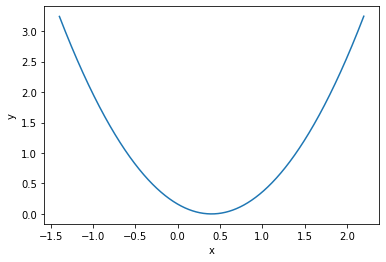

In [3]:
plot(lambda x: (x - 0.4) ** 2 , -1.4, 2.2 , step=0.001)

#### Find the derivative of the function

If we write our function as follows:
Using calculus I we can easily calcuate the derivate of the Loss function:

$ 
\Large y=(x-a)^2= x^2-2ax+a^2
$

so:

$
\Large \frac{dy}{dx}=2(x-a)
$

#### Plot the tangent lines two arbitrary points

For a given point X that belongs to the loss function the equation for the tangent line to it is given by the following:

 $
 \Large g(x) = f'(X) (x-X) + f(X)
 $ 
 
 which graphically results to the following represenation:

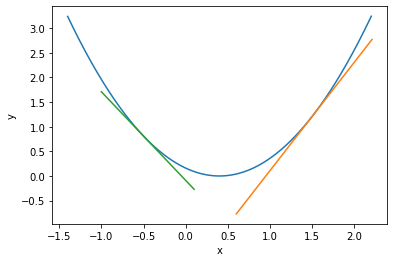

In [4]:
mix_x, max_x = -1.4, 2.2
a = 0.4
plot(lambda x: (x - 0.4) ** 2 , -1.4, 2.2 , step=0.001)
#plot(function , mix_x, max_x , step=step)
derivative = lambda x: 2 * (x-a)
def tangent_line(x, X):
     return derivative(X) * (x - X) + (X - 0.4) **2
X1, X2 = 1.5, -0.5
plot(functools.partial(tangent_line, X=X1) , 0.6, max_x, step=0.01)
plot(functools.partial(tangent_line, X=X2) , -1, 0.097, step=0.01)

# der1 = derivative(X1)
# der2 = derivative(X2)


As we can notice from the above graphical represenation, the derivate of point is positive when it lies on the right of the minuum value and negative otherwise.  Based on this notification, we will try to approach the  value of x that minimizes the function by adding or subtracting a small step each time.

See for example:

$
\Large f'(1.5) = 2.2
$

$
\Large f'(-0.5) = -1.8
$

It is easy to prove that the minimum value of our function will be 0 and this will be the outcome of the function when x becomes a:

$ 
\Large minf(x) = f(a) = 0
$

Also we can see that the slope of the tangent line (derivative) for our function has a positive value when we are on the right of $x=a$ and negative when on the left.  This is very important for our procedeure as it dicatates the **sign** of the alteration we need to apply to x; in other words if the slope will be postive we will need to subtract a small value from the current value otherise we will add to it.

So, if we pretend that we do not know the analytical solution of how to find the minimum value for the function $f(x)$ we can start from any arbitrary value of x and start moving accros the axis of x until we will find the value of x that will have the minimum value.

![Finding the minimum Value](./images/backprog-1.png "Finding the minimum Value")

As we can see in the above picture, we need to move the $x$ by a value $Δx$ towards the **left** direction (meaning subtracting a small value) to find a lower value for $y$.  

This movement depends on two factors:

**Learning rate**

You can thing of the learning rate as the unit of weight change per each learning iteration.  

The learning rate is one of the hyperparameters of the ANN and most of
times finding its best value results in a trial and error procedure since
avery small learning rate will result to very slow training process while
a very large might not be able to find the minumum value. 

The following pictute helps to develop intution about how a large vs a smaller learning rate value might affect learning ([source](./images/https://www.ibm.com/cloud/learn/gradient-descent#:~:text=Gradient%20descent%20is%20an%20optimization,each%20iteration%20of%20parameter%20updates))

![Learning rate intuition](./images/learning-rate.png)


In practice the learning rate is a value that ranges anywhere from 0.01 to
0.0001 while modern machine learning libraries provide functions that allow
the training procedure to adjust it based on several user defined criteria.




**The partial derivate of cost over weight**

Expresses the impart that a specific weight has over a calculated value.

It can be positive or negative and its value give us an indicator of how important the specific weight is in the calculated value.


#### The weight adjustment

During each iteration phase each weight of the ANN will be adjusted based on the following formula:

$
   \Large w_{n+1}= w_n - R * \frac{\partial C}{\partial w}
$

where:

| Syntax                               | Description                              |
| -------------------------------------| -----------------------------------------|
| wn+1                    | The weight during the n + 1 epoch            |
|$\Large w_n$                          | The weight during the n-th epoch         |
|$\Large R $                           | The learning rate                        |
|$\Large \frac{\partial C}{\partial w}$|The partial derivative of Cost over weight|








#### Adjusting the weight using back propagation

In our example we only have one observation consistinting
of one input: $x_0 = 1$ and one expected output $Y=0.5$

We randomly assign a weight, let say 0.3 thus
we know can have a prediction:

$\Large x_1 = x_0 \times w = 1 \times 0.3 = 0.3$

since the expected output is 0.5 the **Cost** will be:

$\Large C = (x_1 - Y)^2 = (0.3 - 0.5) ^2 = 0.04$

Since the only parameter that can be changed in the NN is the weight, what we need is the 
rate of the Loss over weight or more formally:

$\Large \frac{\partial L}{\partial w}$


As discussed above the derivate of the cost function will be

$
\Large\frac{\partial C}{ \partial x}=2(x_1 - Υ)
$

while the derivate of the predicted value will be:

$
\Large\frac{\partial x}{\partial w}=x_0
$

$
\Large\Large\frac{\partial C}{\partial w} = \frac{\partial C}{\partial x} \times  \frac{\partial x}{\partial w}  \Rightarrow 
$


$
\Large\frac{\partial L}{\partial w} = 2(x_1 - Υ) \times x_0 \Rightarrow 
$

$
\Large\frac{\partial L}{\partial w} = 2(x_0 \times w_0 - Υ) \times x_0
$


So the new weight will be given by the following formula:

$
\Large w_1 = w_0 - R\times 2(x_0 \times w_0 - Υ) \times x_0
$

By substituding the follwing values:

| Variable    | Description                     | Value|
| ----------- | --------------------------------|-------
| $w_0$       | The weight during the 1st epoch |0.3|
| $R$        | The learning rate               |0.01|
| $x_0$       | The input value for x           |1|
| $Y$         | The expected value for Y        |0.5|




#### Understanding the simpler possible ANN (consisting of only two neurons)

The data that we need in order to **train** our model are the simplest possible and consider of just a pair of an input and its desiser output.  Some as simple as the following is enough for us to start our first contact with neural networks.

| Input| Output |
| --- | --- |
| 1 | 0.5 |


We can visualize this ANN as follows:

![simplest-nn](./images/simplest-nn.png)

And following the algorithm that is presented above we can code a training session as follows:

In [5]:
w = 0.3
lr = 0.01
x0 = 1
Y = 0.5
loss = sys.maxsize
history = []

while loss > 0.00001:
    w = w - lr * 2 * (x0 * w - Y ) * x0
    loss = (Y - x0*w)**2
    history.append([loss, w])

print(f"Best estimate for w: {w:8.4}")
df = pd.DataFrame(history, columns = ['Loss', 'Weight'])


Best estimate for w:   0.4969


In [6]:
df

,Loss,Weight
0,0.038416,0.304000
1,0.036895,0.307920
2,0.035434,0.311762
3,0.034031,0.315526
4,0.032683,0.319216
...,...,...
201,0.000011,0.496622
202,0.000011,0.496689
203,0.000011,0.496755
204,0.000010,0.496820


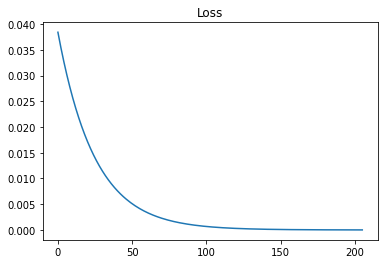

In [7]:
_ = df.Loss.plot(title="Loss")

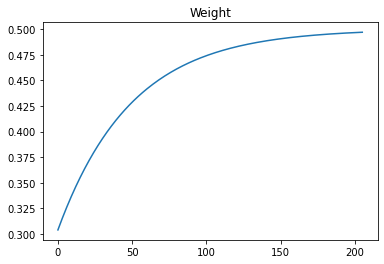

In [8]:
_ = df.Weight.plot(title="Weight")

#### Adding a hidden layer to the 2 neural NN

Now that we understand the simplest possible case of an ANN that consists
of two neurons (or two layers having a single neuron each one) we can add
more layers (again consisting of a single neuron) and see how the above
mechanism to train the weights can be generalized.

Keep the rest of the constraints, let' add one more **hidden layer** to the
above network which now will look as follows:

![3 layered NN](./images/ann-3-layers.png)

We are given the values for the input x0, the weights w1 and w2 are assigned 
randomly, we are given the expected value Y and our objective is to **train**
the ANN assigning to the weights w1 and w2 the best values we can find so the 
Cost (or loss or error) will be minimized.

Repeating what we have done above, the cost function will be:

$\Large C = (x_2 - Y) ^2$ 

while its **gradient descent** (here derivative) will be the following:


$
\Large\frac{\partial C}{\partial x_2} = 2(x_2 - Υ) 
$

The objective is to run serveral consecutive iterations trying to adjust the 
randomly selected weights trying to minimize the **Cost**.

Assuming a learning rate of **η** the new weight for each iteration will be 
given from the following formula:

$\Large w_i' = w_i - \eta \times  \frac{\partial C}{\partial w_i}$

What we are missing for now from the above formula is the following:

$\Large \frac{\partial C}{\partial w_i}$

which can be thought as the **impact** that a particular weigtht has on
the **Cost**.  Note though that we already have the rate of how much a change
in the value of $\Large x_2$ is affecting the cost $\Large\frac{\partial C}{\partial x_2}$.

# PAY ATTENTION HERE !

## Step 1: Calculate the next value for $\Large w_2$

This step is one of the MOST important to understand how backpropagation works, 
so please read carefully:

We want to calculate: $\Large \frac{\partial C}{\partial w_2}$ so, let's try the following trick:

Is it possible for us to write our expression as follows?

$\Large \frac{\partial ?}{\partial w_2} \times \frac{\partial C}{\partial ?}$

Think now: Can we substitue $\Large {\partial ?}$ with something that will result 
to two partial derivatives that is known to us? 

If we can do so then we would have our prolbem solved (applying the **CHAIN RULE** from Calculus)

Since we already have calculated: $\Large\frac{\partial C}{\partial x_2}$

we immediatly think if we can try the following:

$\Large \frac{\partial x_2}{\partial w_2} \times \frac{\partial C}{\partial x_2}$

or in other words to calculate the following expression:

$\Large \frac{\partial x_2}{\partial w_2}$

which expresses the impact of $\Large w_2$ to $\Large x_2$

and we are in luck since this derivative is really easy to calculate:

since $\Large x_2 = x1 \times w_2$ then 

$
\Large \frac{\partial x_2}{\partial w_2} = x_1 
$


So we can now calculate:

$\Large \frac{\partial C}{\partial w_2} = \Large \frac{\partial x_2}{\partial w_2} \times \frac{\partial C}{\partial x_2}  = x_1 \times 2(x_2 - Υ)  $

while the new value for $w_2$ for the next iteration will be:

$\Large w_2' = w_2 - \eta \times  x_1 \times 2(x_2 - Υ)$

## Step 2: Calculate the next value for $\Large w_1$

Now, we need to calculate: $\Large \frac{\partial C}{\partial w_1}$ 

we think similarly to before but with one more trick! We will have to add one more
layer to our **chain** of derivations as follows:

$\Large \frac{\partial C}{\partial w_1}$ 


$\Large \frac{\partial C}{\partial w_1} = \Large \frac{\partial ? }{\partial w_1} \times \Large \frac{\partial x_2}{\partial ?} \times \frac{\partial C}{\partial x_2} $

Now is is easly to see that the question mark should be substituted by the ${\Large \partial x_1}$

and our expression now it will become:

$\Large \frac{\partial C}{\partial w_1} = \Large \frac{\partial x_1 }{\partial w_1} \times \Large \frac{\partial x_2}{\partial x_1} \times \frac{\partial C}{\partial x_2} $


Since,

$\Large \frac {\partial x_1} {\partial w_1}  = x_0$

$\Large \frac {\partial x_2} {\partial x_1}  = w_2$

$\Large\frac{\partial C}{\partial x_2} = 2(x_2 - Υ)$

we have:

$\Large \frac{\partial C}{\partial w_1} = x_0 \times w_2 \times 2(x_2 - Y) $ 

and 

$\Large w_1' = w_1 - \eta \times  x_0 \times w_2 \times 2(x_2 - Y)$

### Adding more hidden layers

The process we have described above can now be generalized to cover as many
hidden layers we need.

Here is how we can carry on the chain rule to any number of hidden layers.

Try to understand how this is possible

Hint: The key is to realize that the formula:

$
\Large x_i = w_i \times x_{i-1}
$

allows us to calculate both:

$
\Large \frac {\partial x_i} {\partial w_i} = x_{i-1}
$

and

$
\Large \frac {\partial x_i} {\partial x_{i-1}} = w_i
$


![nn-multiple-hidden-layers](./images/nn-multiple-hidden-layers.png)